In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np


In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
#this is where we load the dataset in the to train them. this dataset is imported from the tensorflow library so it alredy has the training and testing data.

In [3]:
len(X_train)

60000

In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

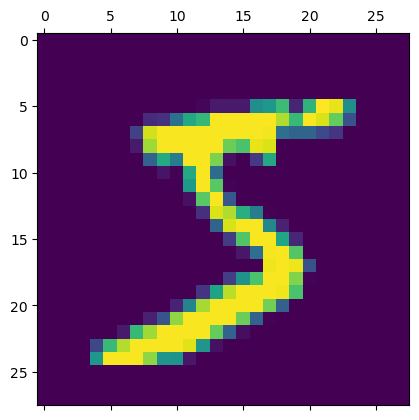

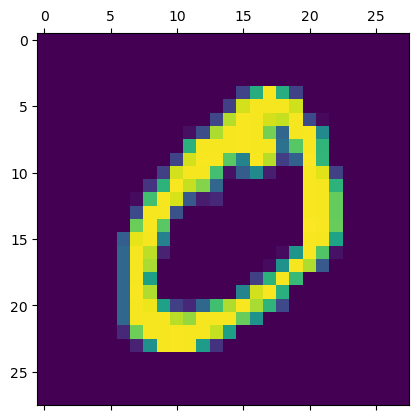

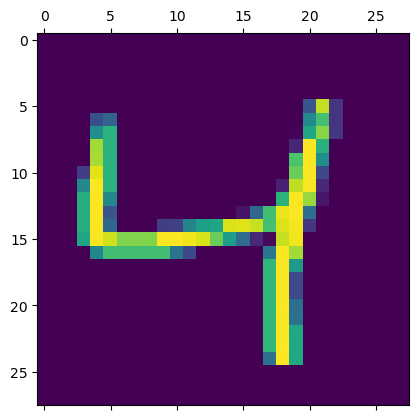

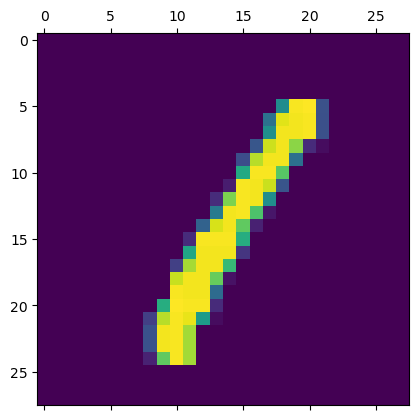

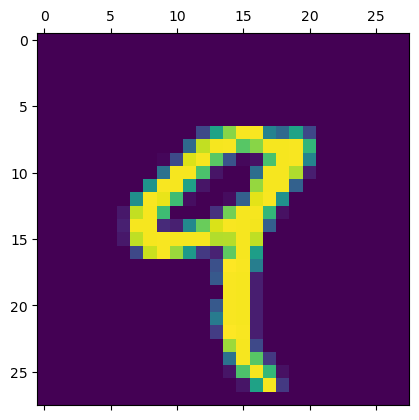

In [6]:
for i in range(5):
    plt.matshow(X_train[i])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

In [13]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4711 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3041 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2835 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2733 - accuracy: 0.9230
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2667 - accuracy: 0.9255


In [15]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2710 - accuracy: 0.9252


[0.2709921896457672, 0.9251999855041504]

In [16]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 870us/step


array([2.6804885e-02, 2.6363634e-07, 5.5142812e-02, 9.5654100e-01,
       2.1359937e-03, 1.8570738e-01, 9.6659312e-07, 9.9976480e-01,
       8.0771610e-02, 7.0209062e-01], dtype=float32)

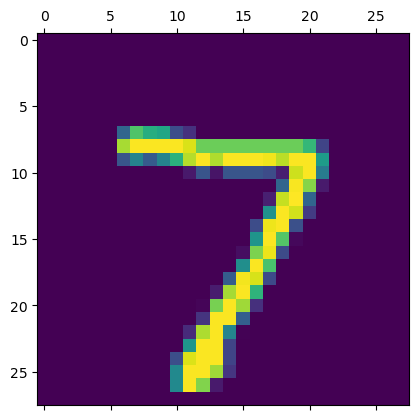

In [17]:
plt.matshow(X_test[0])

In [18]:
np.argmax(y_predicted[0])

7

In [19]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [20]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    2,    2,    0,    5,    4,    2,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   7,    7,  942,   16,    9,    5,   10,    8,   24,    4],
       [   3,    0,   24,  909,    1,   40,    2,    9,   14,    8],
       [   2,    1,    6,    2,  922,    0,    6,    3,    7,   33],
       [   8,    2,    6,   17,    8,  812,   10,    3,   21,    5],
       [  12,    3,    9,    1,    8,   18,  903,    2,    2,    0],
       [   1,    5,   28,    6,    9,    1,    0,  938,    1,   39],
       [   9,   10,    7,   25,    9,   55,    9,   10,  828,   12],
       [  11,    7,    1,   11,   30,   10,    0,   16,    5,  918]])>

Text(95.72222222222221, 0.5, 'Truth')

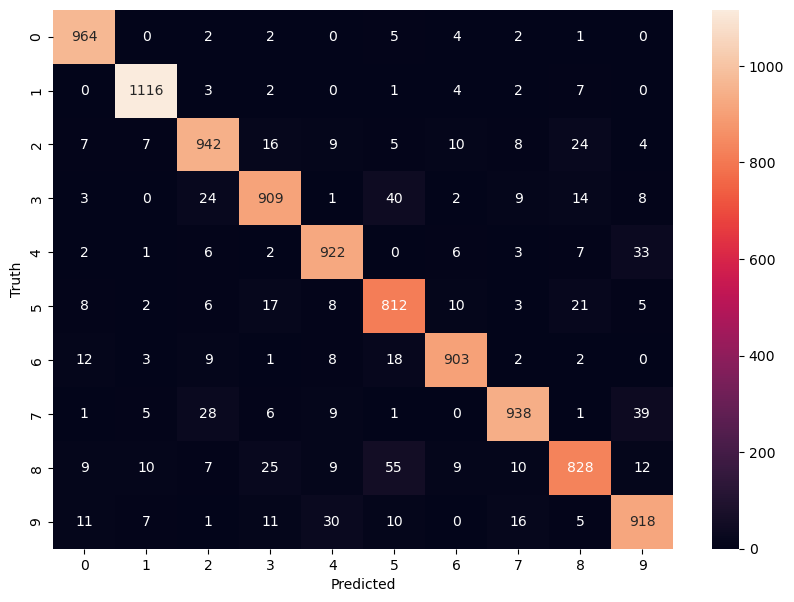

In [22]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

In [23]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2710 - accuracy: 0.9252


[0.2709921896457672, 0.9251999855041504]

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)
#this is when we dont give the model flattered array, then we have to use another api which is "keras.layers.Flatten(input_shape=(28, 28))"

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2754 - accuracy: 0.9215
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1242 - accuracy: 0.9634
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0861 - accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0656 - accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0499 - accuracy: 0.9851
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0404 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0329 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0272 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0220 - accuracy: 0.9934
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.017

In [25]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0741 - accuracy: 0.9789


[0.0741240531206131, 0.9789000153541565]